In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
diabetes = pd.read_csv('diabetes.csv')

In [7]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [11]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
diabetes.fillna(diabetes.mean(), inplace=True)

In [13]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


<Axes: xlabel='Outcome', ylabel='count'>

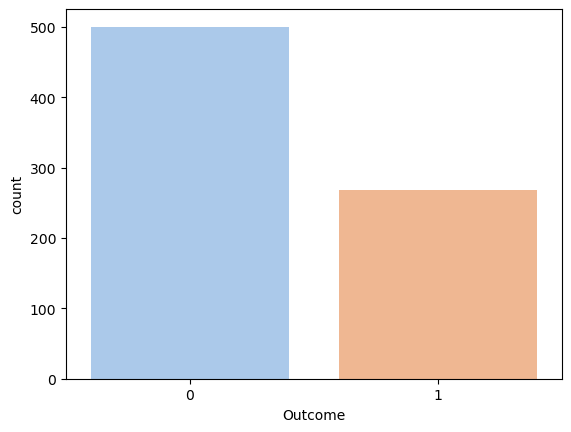

In [14]:
sns.countplot(x='Outcome', data=diabetes, palette='pastel')

<Axes: xlabel='Outcome', ylabel='Age'>

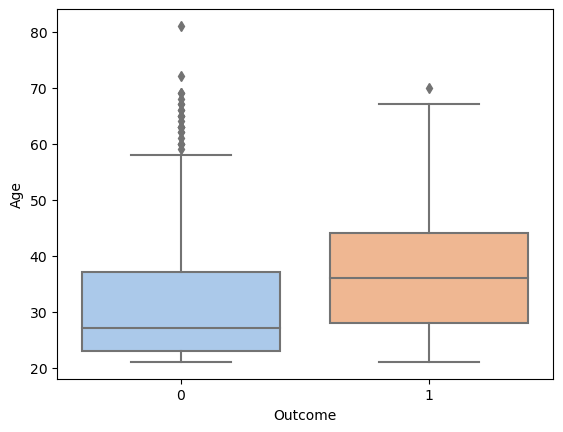

In [15]:
sns.boxplot(x='Outcome', data=diabetes, y='Age',palette='pastel')

C:\Users\arwam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


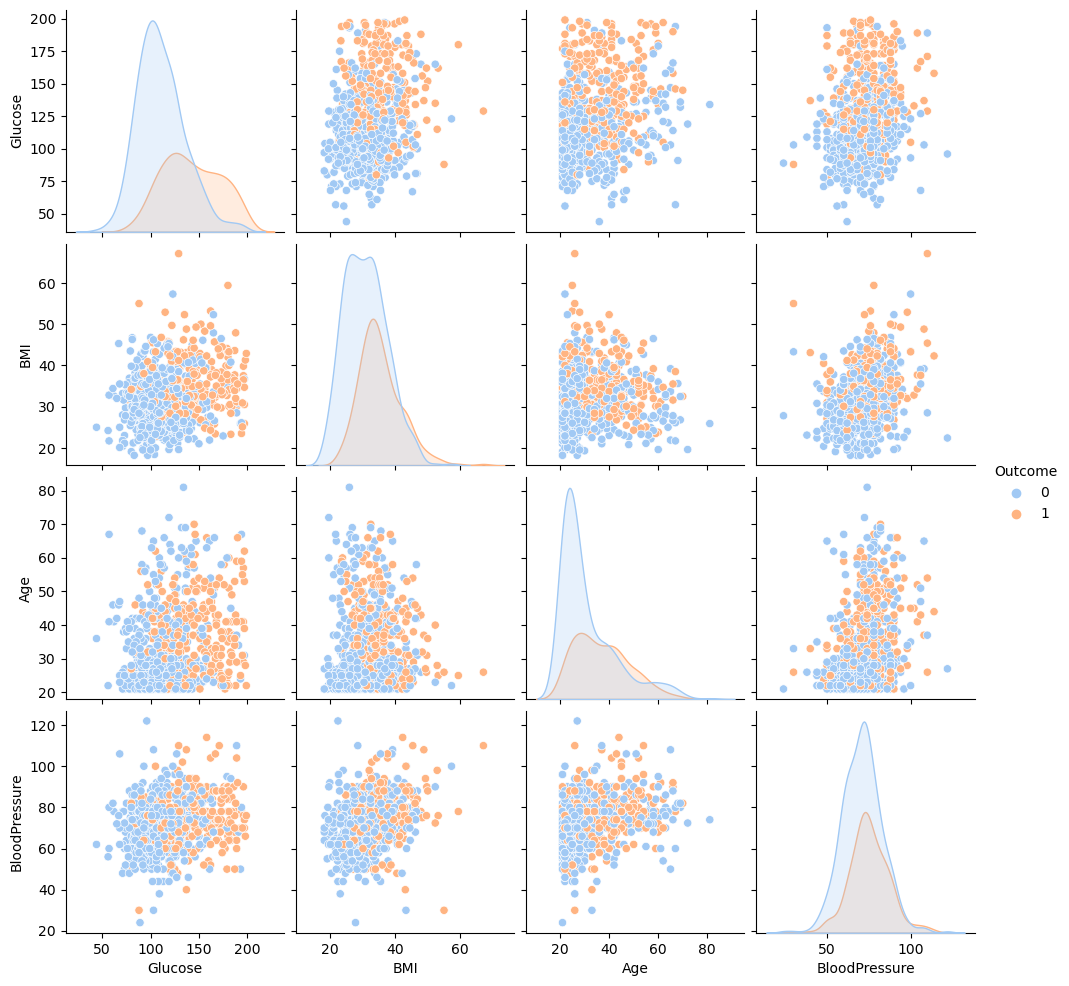

In [16]:
sns.pairplot(data=diabetes, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'BloodPressure'], palette='pastel')
plt.show()

In [17]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
smote = SMOTE(random_state=101)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [23]:
X_train_resampled = scaler.fit_transform(X_train_resampled)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logmodel = LogisticRegression(random_state=101, max_iter=1000)
logmodel.fit(X_train, y_train)

# Train Logistic Regression on SMOTE data
logmodel_smote = LogisticRegression(random_state=101, max_iter=1000)
logmodel_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions using both models
predictions_log = logmodel.predict(X_test)
predictions_smote = logmodel_smote.predict(X_test)

# Evaluate Logistic Regression (Original)
print("Logistic Regression (Original Data):")
print("Accuracy:", accuracy_score(y_test, predictions_log))
print(confusion_matrix(y_test, predictions_log))
print(classification_report(y_test, predictions_log))

# Evaluate Logistic Regression (SMOTE)
print("\nLogistic Regression (After SMOTE):")
print("Accuracy:", accuracy_score(y_test, predictions_smote))
print(confusion_matrix(y_test, predictions_smote))
print(classification_report(y_test, predictions_smote))

Logistic Regression (Original Data):
Accuracy: 0.7705627705627706
[[131  19]
 [ 34  47]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.71      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231


Logistic Regression (After SMOTE):
Accuracy: 0.7532467532467533
[[106  44]
 [ 13  68]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       150
           1       0.61      0.84      0.70        81

    accuracy                           0.75       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.79      0.75      0.76       231



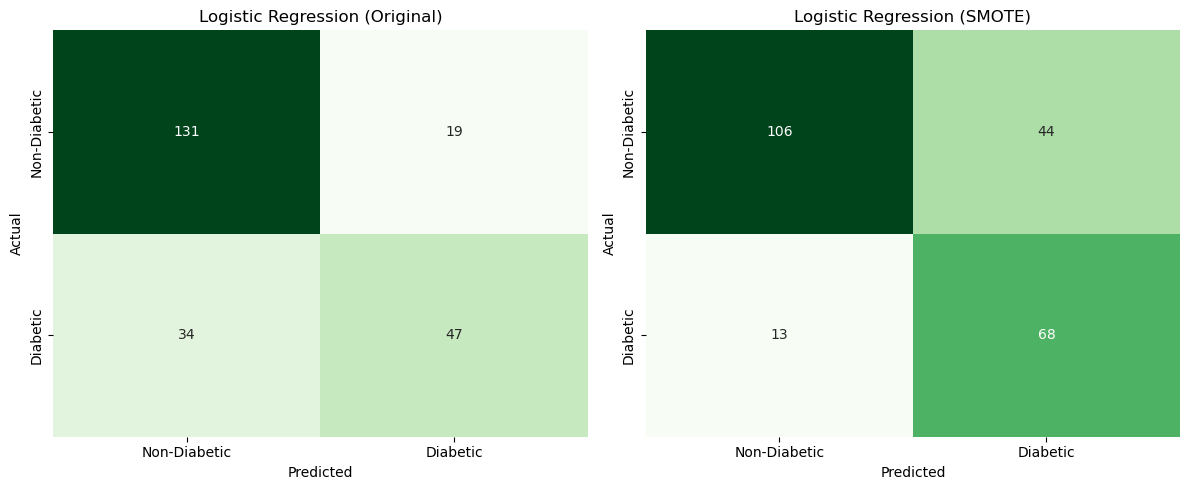

In [56]:
# Function to plot confusion matrix
def plot_confusion_matrix(ax, y_true, predictions_cm, title, cmap='Greens'):
    cm = confusion_matrix(y_true, predictions_cm)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False,
                xticklabels=['Non-Diabetic', 'Diabetic'],
                yticklabels=['Non-Diabetic', 'Diabetic'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_confusion_matrix(axes[0], y_test, predictions_log, "Logistic Regression (Original)")
plot_confusion_matrix(axes[1], y_test, predictions_smote, "Logistic Regression (SMOTE)")

plt.tight_layout()
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)


predictions_knn = knn.predict(X_test)

In [29]:
print(classification_report(y_test, predictions_knn))

print(accuracy_score(y_test,predictions_knn))

print(confusion_matrix(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       150
           1       0.68      0.68      0.68        81

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231

0.7748917748917749
[[124  26]
 [ 26  55]]


In [31]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=101)
svm_model.fit(X_train_resampled, y_train_resampled)


SVC(kernel='linear', random_state=101)

In [34]:
predictions_log = logmodel.predict(X_test)
predictions_knn = knn.predict(X_test)
predictions_svm = svm_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression:")
print(confusion_matrix(y_test, predictions_log))
print(classification_report(y_test, predictions_log))

# Evaluate KNN
print("knn")
print(confusion_matrix(y_test, predictions_knn))
print(classification_report(y_test, predictions_knn))

# Evaluate SVM
print("svm")
print(confusion_matrix(y_test, predictions_svm))
print(classification_report(y_test, predictions_svm))
print("smote")
print(confusion_matrix(y_test, predictions_smote))
print(classification_report(y_test, predictions_smote))

Logistic Regression:
[[131  19]
 [ 34  47]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.71      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231

knn
[[124  26]
 [ 26  55]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       150
           1       0.68      0.68      0.68        81

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231

svm
[[104  46]
 [ 14  67]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.78       150
           1       0.59      0.83      0.69        81

    accuracy                           0.74       231
   macro avg       0.74      0

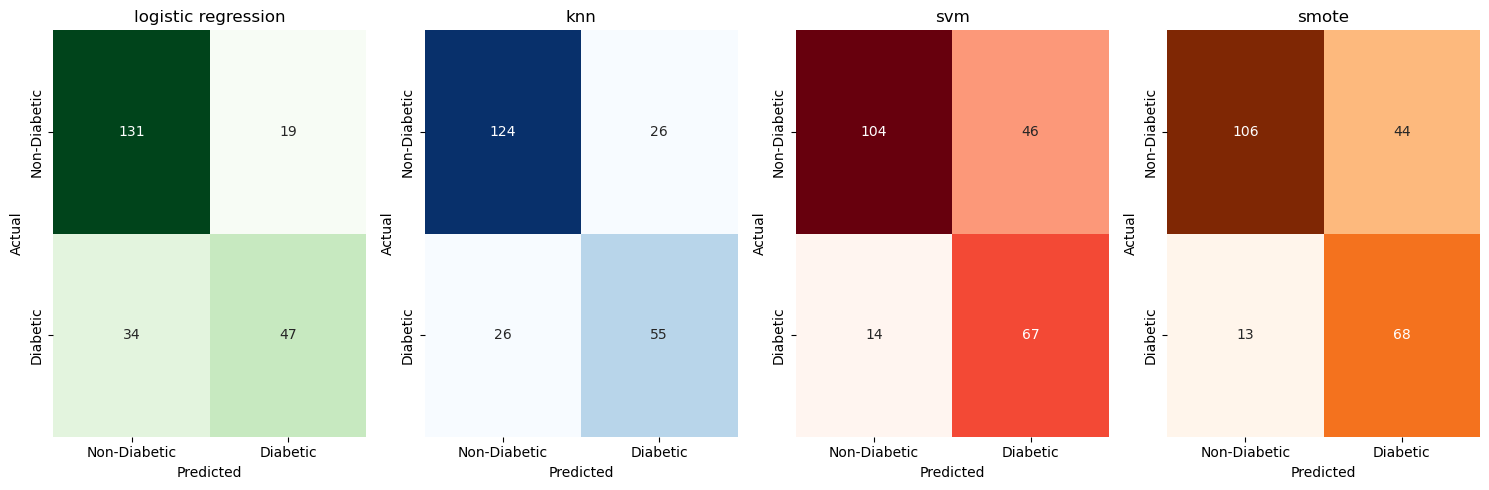

In [52]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

plot_confusion_matrix(axes[0], y_test, predictions_log, "logistic regression", cmap='Greens')
plot_confusion_matrix(axes[1], y_test, predictions_knn, "knn", cmap='Blues')
plot_confusion_matrix(axes[2], y_test, predictions_svm, "svm", cmap='Reds')
plot_confusion_matrix(axes[3], y_test, predictions_smote, "smote", cmap='Oranges')

plt.tight_layout()
plt.show()